# Description

> This notebook is an implementation of **Linear Regression Algortihm** for univariate and multivariate data using Python

# reading the data

In [1]:
import numpy as np
import pandas as pd
univariateData = np.loadtxt('univariateData.dat', delimiter = ',')
multivariateData = np.loadtxt('multivariateData.dat', delimiter = ',')

In [2]:
univariateData

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

In [3]:
multivariateData

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

# preprocessing

first we need to preprocess our data for better computations and performance
* handle the NaNs in the data, in this case we don't need this step because our data is clean already
* label encoding, in this case we don't need this step either because there're no strings in our data
* Normalizing the data, this is done here
* splitting the data, this is done bellow using **train_test_split**
* seperating data into features "X" and output "Y"
* adding column of 1's to our features "X" for both training and testing

### Normalizing the Data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
univariateData = StandardScaler().fit_transform(univariateData)

In [6]:
multivariateData = StandardScaler().fit_transform(multivariateData)

### splitting the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
uni_X = univariateData[:, :-1]
uni_y = univariateData[:, -1]
uni_X_train, uni_X_test, uni_y_train, uni_y_test = train_test_split(uni_X, uni_y, test_size = 0.33)

In [9]:
multi_X = multivariateData[:, :-1]
multi_y = multivariateData[:, -1]
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, multi_y, test_size = 0.33)

### attaching 1's to training features X

In [10]:
uni_X_train = np.c_[np.ones(uni_X_train.shape[0]), uni_X_train]
uni_X_train

array([[ 1.        ,  3.16404339],
       [ 1.        , -0.08704158],
       [ 1.        , -0.30042464],
       [ 1.        , -0.24257874],
       [ 1.        , -0.16135551],
       [ 1.        , -0.75519159],
       [ 1.        ,  0.03470234],
       [ 1.        , -0.61258989],
       [ 1.        , -0.61978491],
       [ 1.        , -0.40790839],
       [ 1.        ,  0.03514392],
       [ 1.        , -0.48978099],
       [ 1.        , -0.70726806],
       [ 1.        ,  0.10865262],
       [ 1.        , -0.44941614],
       [ 1.        ,  0.4179087 ],
       [ 1.        , -0.51188555],
       [ 1.        ,  3.40768709],
       [ 1.        ,  0.06457337],
       [ 1.        , -0.74142494],
       [ 1.        , -0.63009691],
       [ 1.        ,  1.214634  ],
       [ 1.        , -0.17751184],
       [ 1.        ,  0.33606207],
       [ 1.        , -0.14460176],
       [ 1.        , -0.79277713],
       [ 1.        ,  0.72656735],
       [ 1.        , -0.19114862],
       [ 1.        ,

In [11]:
uni_X_test = np.c_[np.ones(uni_X_test.shape[0]), uni_X_test]
uni_X_test

array([[ 1.        , -0.0165979 ],
       [ 1.        ,  0.5491594 ],
       [ 1.        , -0.28286567],
       [ 1.        ,  0.53928898],
       [ 1.        , -0.80532297],
       [ 1.        , -0.56048442],
       [ 1.        , -0.2445788 ],
       [ 1.        ,  1.75283204],
       [ 1.        , -0.46778033],
       [ 1.        , -0.67402031],
       [ 1.        ,  0.92163816],
       [ 1.        , -0.47455975],
       [ 1.        , -0.42699988],
       [ 1.        , -0.33177623],
       [ 1.        , -0.80251769],
       [ 1.        ,  3.14560127],
       [ 1.        , -0.1359002 ],
       [ 1.        ,  3.64769432],
       [ 1.        , -0.68007244],
       [ 1.        ,  0.26504695],
       [ 1.        ,  1.35957343],
       [ 1.        , -0.69103381],
       [ 1.        , -0.41868794],
       [ 1.        , -0.58910866],
       [ 1.        , -0.6543314 ],
       [ 1.        , -0.77417917],
       [ 1.        , -0.71506051],
       [ 1.        ,  2.80507153],
       [ 1.        ,

In [12]:
multi_X_train = np.c_[np.ones((multi_X_train.shape[0], 1)), multi_X_train]
multi_X_train

array([[ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  8.09357707e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -4.91995958e-02,  1.10220517e+00],
       [ 1.00000000e+00,  2.81647389e+00,  1.10220517e+00],
       [ 1.00000000e+00,  7.73743478e-01,  1.10220517e+00],
       [ 1.00000000e+00,  2.53521350e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.16966387e-01, -2.26093368e-01],
       [ 1.00000000e+00,  2.05187753e-01,  1.10220517e+00],
       [ 1.00000000e+00, -4.28236746e-01, -1.55439190e+00],
       [ 1.00000000e+00, -1.89112638e-01,  1.10220517e+00],
       [ 1.00000000e+00, -1.27280274e+00, -2.88269044e+00],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.00114703e-02,  1.10220517e+00],
       [ 1.00000000e+00, -1.01841540e+00, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01

In [13]:
multi_X_test = np.c_[np.ones((multi_X_test.shape[0],1)), multi_X_test]
multi_X_test

array([[ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        ,  1.44532608, -0.22609337],
       [ 1.        , -0.9319237 , -0.22609337],
       [ 1.        ,  0.38071502,  1.10220517],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.14332291, -1.5543919 ],
       [ 1.        , -0.14077904, -0.22609337],
       [ 1.        , -0.97262567, -0.22609337],
       [ 1.        ,  0.66817273, -0.22609337],
       [ 1.        ,  0.13141542, -0.22609337],
       [ 1.        ,  1.31050078,  1.10220517],
       [ 1.        , -1.14560907, -0.22609337],
       [ 1.        , -0.20564782, -1.5543919 ],
       [ 1.        , -1.01459959, -0.22609337],
       [ 1.        ,  3.15099326,  2.4305037 ]])

# Linear Regression

### setting hyperParameters

In [14]:
eta = 0.01
n_iterations = 1000

### Implementation

In [15]:
def cost(X, y, weights):
    return (X.dot(weights) - y.reshape((X.shape[0],1))).T.dot(X.dot(weights) - y.reshape((X.shape[0],1)))

In [16]:
def gradients(X, y, weights):
    return (2/X.shape[0]) * (X.T.dot(X.dot(weights) - y.reshape(X.shape[0],1)))

In [17]:
def Batch_grad_descent(X, y, weights):
    print(cost(X, y, weights))
    return weights - eta * gradients(X, y, weights)

In [18]:
def fit(X,y):
    weights = np.random.randn(X.shape[1], 1)
    for iteration in range(n_iterations):
        weights = Batch_grad_descent(X, y, weights)
    return weights

In [19]:
def predict(X, weights):
    return X.dot(weights)

In [20]:
from sklearn.metrics import mean_absolute_error
def Evaluate_Performance(X_test, y_test):
    return mean_absolute_error(y_test, predict(X_test, weights))

### Univariate

##### fitting

In [21]:
weights = fit(uni_X_train, uni_y_train)

[[40.74859084]]
[[39.99403913]]
[[39.26994747]]
[[38.57508151]]
[[37.90825706]]
[[37.26833806]]
[[36.65423462]]
[[36.06490112]]
[[35.4993344]]
[[34.95657209]]
[[34.43569087]]
[[33.93580493]]
[[33.45606444]]
[[32.99565408]]
[[32.55379161]]
[[32.12972656]]
[[31.72273894]]
[[31.33213796]]
[[30.95726087]]
[[30.59747181]]
[[30.25216075]]
[[29.92074237]]
[[29.60265513]]
[[29.29736023]]
[[29.00434075]]
[[28.72310074]]
[[28.45316433]]
[[28.19407496]]
[[27.9453946]]
[[27.70670294]]
[[27.47759671]]
[[27.25768902]]
[[27.04660861]]
[[26.84399929]]
[[26.6495193]]
[[26.4628407]]
[[26.28364886]]
[[26.11164187]]
[[25.94653006]]
[[25.78803547]]
[[25.63589141]]
[[25.48984198]]
[[25.34964163]]
[[25.21505475]]
[[25.08585525]]
[[24.96182621]]
[[24.84275946]]
[[24.72845527]]
[[24.61872197]]
[[24.51337565]]
[[24.41223982]]
[[24.31514513]]
[[24.22192909]]
[[24.13243575]]
[[24.04651548]]
[[23.96402469]]
[[23.88482557]]
[[23.8087859]]
[[23.73577879]]
[[23.66568247]]
[[23.59838008]]
[[23.53375949]]
[[23.47171309

In [22]:
weights

array([[0.04431296],
       [0.81546236]])

##### visualization

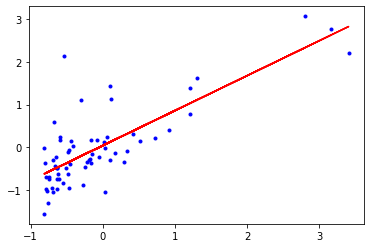

In [23]:
import matplotlib.pyplot as plt
plt.plot(uni_X_train[:,1], uni_y_train,'b.')
plt.plot(uni_X_train[:,1], predict(uni_X_train, weights), 'r-')
plt.show()

##### evaluation

plotting resulting model with testing data

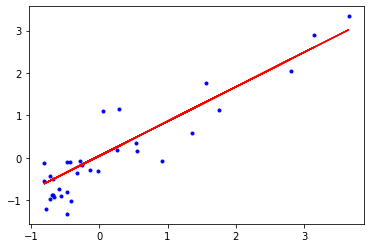

In [24]:
plt.plot(uni_X_test[:,1], uni_y_test,'b.')
plt.plot(uni_X_test[:,1], predict(uni_X_test, weights), 'r-')
plt.show()

using Mean absolute error metric from sklearn metrics

In [25]:
Evaluate_Performance(uni_X_test, uni_y_test)

0.3830613373382408

### Multivariate

##### fitting

In [26]:
weights = fit(multi_X_train, multi_y_train)

[[168.43874902]]
[[159.60931681]]
[[151.28339569]]
[[143.43191576]]
[[136.02749475]]
[[129.04433973]]
[[122.45815462]]
[[116.24605307]]
[[110.38647635]]
[[104.85911618]]
[[99.6448419]]
[[94.72563198]]
[[90.0845095]]
[[85.70548138]]
[[81.57348117]]
[[77.67431514]]
[[73.99461159]]
[[70.52177297]]
[[67.24393098]]
[[64.14990409]]
[[61.22915771]]
[[58.47176656]]
[[55.86837924]]
[[53.41018498]]
[[51.08888215]]
[[48.89664875]]
[[46.82611456]]
[[44.87033488]]
[[43.02276586]]
[[41.27724124]]
[[39.62795044]]
[[38.06941789]]
[[36.59648368]]
[[35.20428517]]
[[33.8882398]]
[[32.64402887]]
[[31.4675822]]
[[30.35506377]]
[[29.30285815]]
[[28.30755772]]
[[27.36595061]]
[[26.47500944]]
[[25.63188055]]
[[24.83387403]]
[[24.07845421]]
[[23.36323073]]
[[22.68595016]]
[[22.04448809]]
[[21.43684166]]
[[20.86112254]]
[[20.31555031]]
[[19.79844626]]
[[19.30822748]]
[[18.84340137]]
[[18.4025604]]
[[17.98437722]]
[[17.58760005]]
[[17.2110483]]
[[16.85360849]]
[[16.51423037]]
[[16.19192331]]
[[15.88575282]]
[[15

In [27]:
weights

array([[-0.07602583],
       [ 0.75787518],
       [-0.0727321 ]])

##### evaluation

using Mean absolute error metric from sklearn metrics

In [28]:
Evaluate_Performance(multi_X_test, multi_y_test)

0.4407039617773041